In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../data/Water Level - Los Angeles.csv')

data.head()

,Date,Time (GMT),Predicted (ft),Verified (ft)
0,1/1/2023,0:00,2.948,3.22
1,1/1/2023,1:00,3.195,3.52
2,1/1/2023,2:00,3.151,3.51
3,1/1/2023,3:00,2.848,3.31
4,1/1/2023,4:00,2.398,2.93


In [4]:
import numpy as np

# Convert the 'Date' column to datetime type and extract day of week
data['Date'] = pd.to_datetime(data['Date'])
data['Day of Week'] = data['Date'].dt.day_name()

# Group the data by 'Day of Week' and 'Time (GMT)', and calculate the average verified water level
grouped_data = data.groupby(['Day of Week', 'Time (GMT)'])['Verified (ft)'].mean().unstack()

# Reorder the index to start the week from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data = grouped_data.reindex(day_order)

# Display the reshaped data
grouped_data


Time (GMT),0:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,...,22:00,23:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00
Day of Week,,,,,,,,,,,,,,,,,,,,,
Monday,2.242769,2.612769,2.577538,2.707538,2.976154,3.301538,3.606769,3.792308,3.785846,3.604000,...,2.185692,2.111231,2.942769,3.328154,3.601231,3.712000,3.626154,3.384308,3.086462,2.807077
Tuesday,2.244615,2.612154,2.566000,2.673692,2.930769,3.267538,3.567538,3.768462,3.772000,3.593077,...,2.178923,2.113692,2.954154,3.335231,3.614462,3.724615,3.635692,3.416923,3.114000,2.810462
Wednesday,2.246769,2.622769,2.574000,2.694769,2.952923,3.264000,3.557692,3.741846,3.746769,3.558923,...,2.161692,2.086615,2.956615,3.340615,3.622769,3.738154,3.662615,3.447538,3.136308,2.833231
Thursday,2.223231,2.634154,2.581538,2.693846,2.945692,3.258923,3.556308,3.728308,3.726000,3.544000,...,2.139538,2.064769,2.927692,3.329692,3.622308,3.745538,3.668000,3.444923,3.152615,2.852615
Friday,2.198154,2.631538,2.575692,2.694615,2.934615,3.237077,3.536923,3.724154,3.724769,3.540154,...,2.154769,2.075385,2.897385,3.288000,3.582462,3.698769,3.626462,3.401846,3.118462,2.826000
Saturday,2.208923,2.632154,2.580462,2.688000,2.946308,3.261231,3.554615,3.754000,3.754462,3.576923,...,2.180154,2.105077,2.910154,3.300769,3.579692,3.706462,3.639077,3.426308,3.126923,2.840923
Sunday,2.244091,2.666061,2.616818,2.737121,2.974697,3.283939,3.580909,3.761970,3.749091,3.559545,...,2.186970,2.121818,2.927121,3.303182,3.580606,3.690455,3.615606,3.401061,3.123030,2.850606


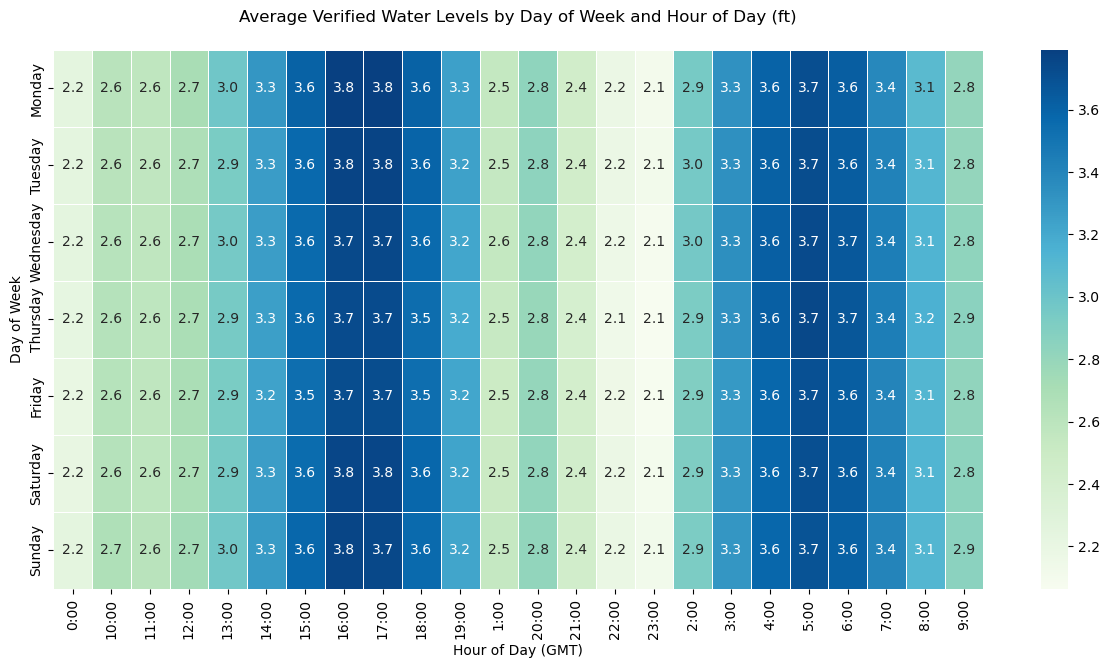

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(grouped_data, cmap="GnBu", annot=True, fmt=".1f", linewidths=.5)
heatmap.set_title('Average Verified Water Levels by Day of Week and Hour of Day (ft)', pad=20)
plt.xlabel('Hour of Day (GMT)')
plt.ylabel('Day of Week')
plt.show()


In [6]:
# Extract month and hour from the data
data['Month'] = data['Date'].dt.month_name()
data['Hour'] = data['Time (GMT)']

# Group the data by 'Month' and 'Hour', and calculate the average verified water level
monthly_avg_data = data.groupby(['Month', 'Hour'])['Verified (ft)'].mean().unstack()

# Reorder the index by month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_data = monthly_avg_data.reindex(month_order)

# Display the reshaped data
monthly_avg_data


Hour,0:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,...,22:00,23:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00
Month,,,,,,,,,,,,,,,,,,,,,
January,1.021935,3.610323,3.718065,3.877097,4.077258,4.274839,4.404677,4.419355,4.257742,3.883871,...,1.431290,1.087097,1.462581,1.901129,2.343065,2.769194,3.074839,3.301774,3.466129,3.535161
February,0.876491,3.329474,3.225614,3.269123,3.414737,3.651404,3.899649,3.994211,3.895263,3.566667,...,1.104211,0.836491,1.788772,2.440000,3.077193,3.574561,3.838596,3.864386,3.765614,3.537368
March,1.312903,2.816613,2.605645,2.582903,2.716290,2.919194,3.135161,3.218387,3.068871,2.734355,...,0.983226,1.008871,2.553871,3.258871,3.804516,4.115806,4.156935,3.949516,3.562742,3.168065
April,2.143667,2.323333,2.090000,2.070333,2.203667,2.392667,2.561667,2.622333,2.517667,2.254667,...,1.437000,1.711000,3.453667,4.019667,4.378000,4.451667,4.236333,3.797333,3.255667,2.735667
May,3.358387,2.229677,1.996129,1.922903,2.029032,2.189677,2.332258,2.424839,2.364516,2.270968,...,2.488065,2.880323,4.406129,4.754516,4.860645,4.709677,4.318387,3.770323,3.187742,2.641935
June,3.903667,1.877000,1.565667,1.401333,1.442000,1.576000,1.794667,2.022000,2.219333,2.422667,...,3.278667,3.572333,4.565667,4.715667,4.696333,4.467000,4.058667,3.527333,2.908667,2.339333
July,4.206129,1.695806,1.390323,1.279677,1.414516,1.719032,2.132903,2.593548,2.974839,3.290968,...,3.843226,3.983226,4.667419,4.792903,4.782903,4.521935,4.063548,3.503548,2.844839,2.222903
August,3.883548,1.537742,1.263871,1.315161,1.666452,2.220000,2.877742,3.493548,3.938387,4.174516,...,3.781935,3.731613,4.375806,4.582903,4.658065,4.480968,4.032581,3.443226,2.747742,2.074839
September,3.158000,1.598333,1.626333,1.940000,2.451000,3.130000,3.821000,4.355000,4.627333,4.626667,...,3.255667,3.083333,3.634333,3.867333,3.926333,3.783333,3.423667,2.890000,2.333000,1.875000


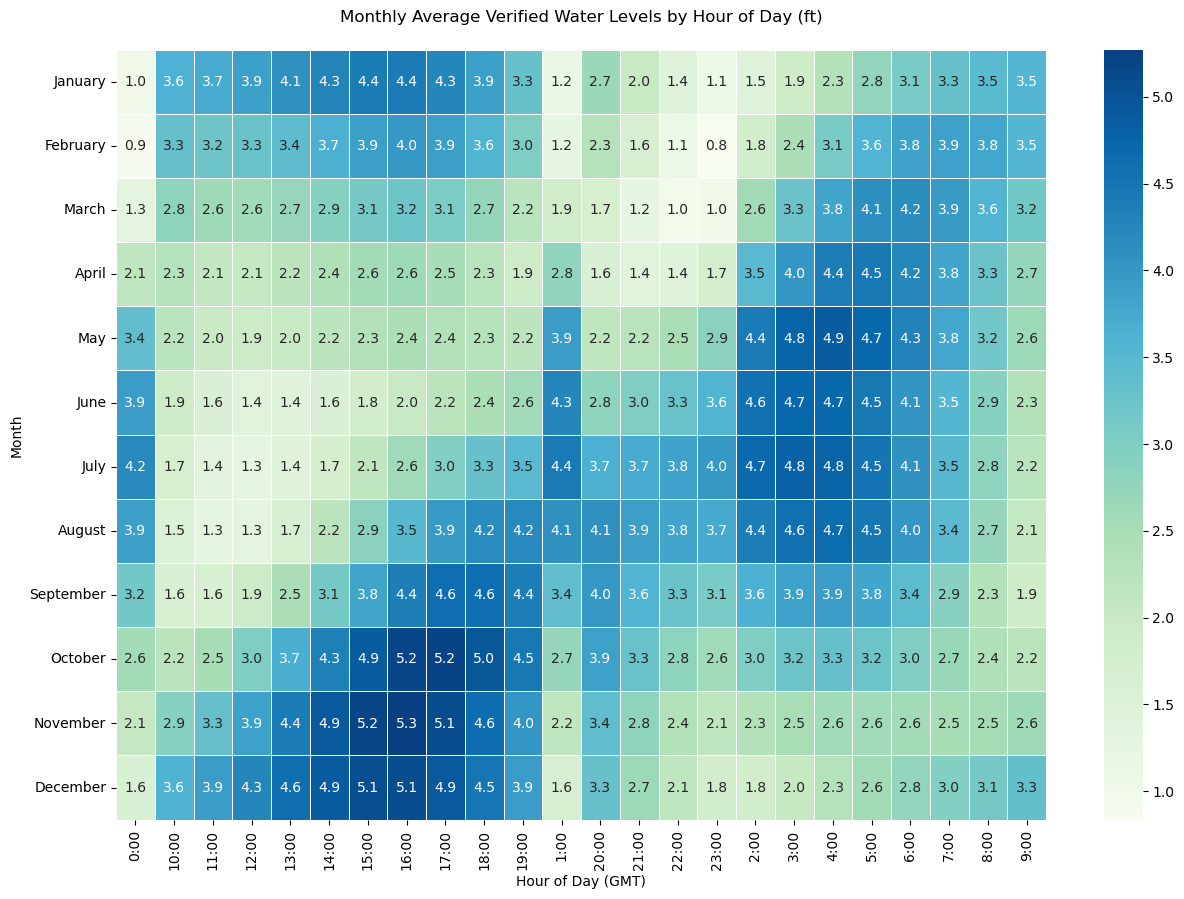

In [11]:
# Plotting the heatmap for monthly average data
plt.figure(figsize=(15, 10))
monthly_heatmap = sns.heatmap(monthly_avg_data, cmap="GnBu", annot=True, fmt=".1f", linewidths=.5)
monthly_heatmap.set_title('Monthly Average Verified Water Levels by Hour of Day (ft)', pad=20)
plt.xlabel('Hour of Day (GMT)')
plt.ylabel('Month')
plt.show()
